In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[0]

In [ ]:
single_image.shape

(28, 28)

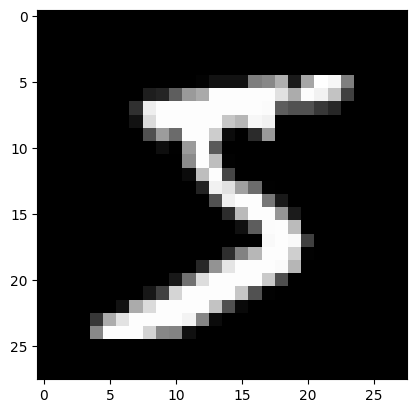

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[0]

5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(60000, 10)

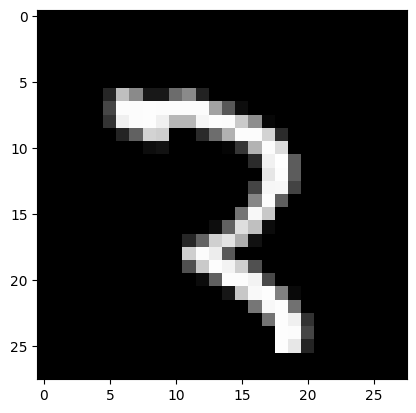

In [ ]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=10,
          batch_size=128,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/10
469/469 [==============================] - 28s 55ms/step - loss: 0.3011 - accuracy: 0.9099 - val_loss: 0.1132 - val_accuracy: 0.9646
Epoch 2/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0940 - accuracy: 0.9721 - val_loss: 0.0681 - val_accuracy: 0.9785
Epoch 3/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0663 - accuracy: 0.9802 - val_loss: 0.0559 - val_accuracy: 0.9821
Epoch 4/10
469/469 [==============================] - 22s 46ms/step - loss: 0.0511 - accuracy: 0.9851 - val_loss: 0.0550 - val_accuracy: 0.9819
Epoch 5/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0426 - accuracy: 0.9876 - val_loss: 0.0523 - val_accuracy: 0.9832
Epoch 6/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0356 - accuracy: 0.9892 - val_loss: 0.0459 - val_accuracy: 0.9839
Epoch 7/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0298 - accuracy: 0.9912 - val_loss: 0.0485 - val_accuracy:

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.301073,0.909883,0.113239,0.9646
1,0.094001,0.972133,0.068088,0.9785
2,0.066309,0.980167,0.055887,0.9821
3,0.051053,0.985100,0.054960,0.9819
4,0.042595,0.987583,0.052286,0.9832


<Axes: >

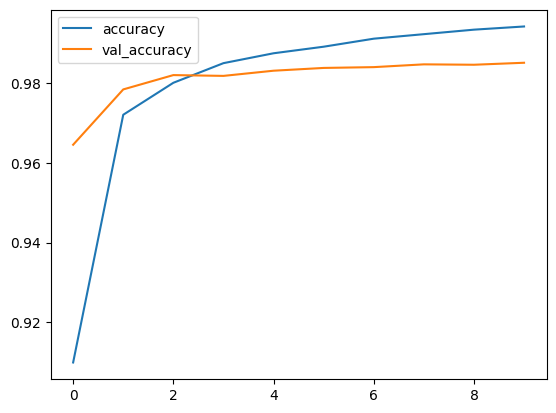

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

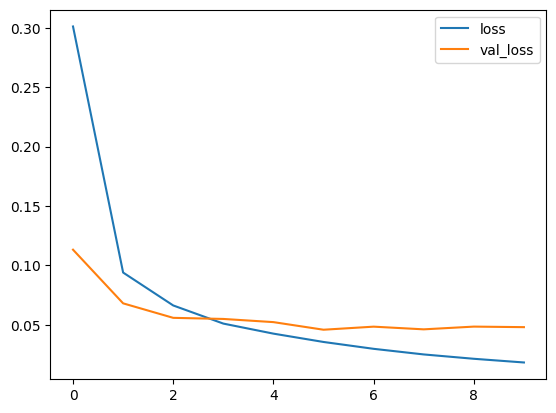

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 7ms/step


In [ ]:
print("Sachin.C  212222230125")
print(confusion_matrix(y_test,x_test_predictions))

Sachin.C  212222230125
[[ 973    0    0    0    0    2    3    1    1    0]
 [   0 1131    1    0    0    0    2    0    1    0]
 [   2    2 1014    0    2    0    3    6    3    0]
 [   0    0    2  983    0   15    0    3    3    4]
 [   0    0    1    0  969    0    2    0    1    9]
 [   1    0    1    2    0  885    3    0    0    0]
 [   4    2    1    0    2    3  945    1    0    0]
 [   0    2    7    0    1    0    0 1012    1    5]
 [   7    0    6    1    2    1    2    2  946    7]
 [   1    1    0    2    6    3    0    2    0  994]]


In [ ]:
print("Sachin.C  212222230125")
print(classification_report(y_test,x_test_predictions))

Sachin.C  212222230125
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.97      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.98      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
img = image.load_img('7.jpg')

FileNotFoundError: [Errno 2] No such file or directory: '7.jpg'

In [ ]:
type(img)

PIL.Image.Image

In [ ]:
img = image.load_img('7.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

In [ ]:
print(x_single_prediction)

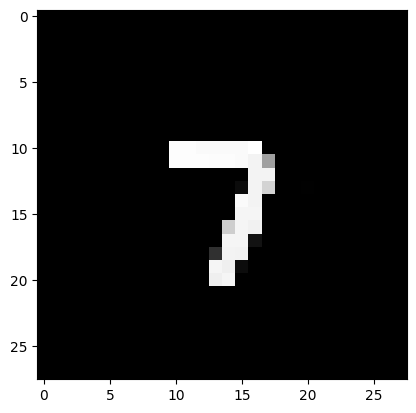